<a href="https://colab.research.google.com/github/NigthDragon5000/Credit-Risk-Modeling/blob/master/MonteCarlo_BarrierCall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Initial variables
N_Days= 252 #Days to expiry
N_Runs = 100000 #Number of Montecarlo Simulation to Run
Spot_Price= 100
strike = 100 
barrier = 10 #distance of barrier away from the strike price
volatility = 0.15 #annualised implied volatility

In [0]:
import numpy as np
import pylab as plt

In [0]:
#We can change this for another more realistic distribution
np.random.seed(25) #Random seed for all the simulation 
rets = np.random.randn(N_Runs,N_Days)*volatility/np.sqrt(N_Days)  #Returns 

In [20]:
rets.shape

(100000, 252)

In [0]:
traces  = np.cumprod(1+rets,1)*Spot_Price #Cumulative product of returns 

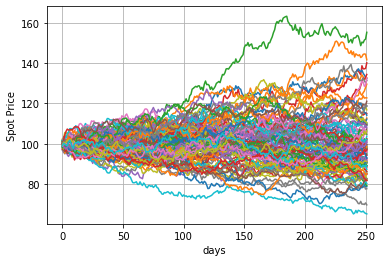

In [22]:
for i in traces[:100,:]: #We choose 100 simulations and we plot 
  plt.plot(i)
plt.grid()
plt.xlabel('days')
plt.ylabel('Spot Price')
plt.show()

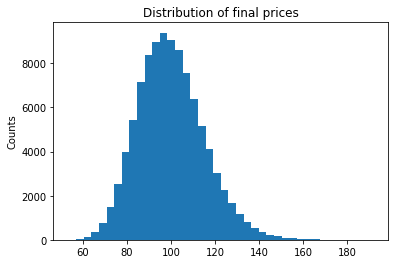

In [23]:
plt.hist(traces[:,-1],bins=40);
plt.title('Distribution of final prices')
plt.ylabel('Counts')
plt.show()

Call

In [30]:
call = np.mean((traces[:,-1]-strike)*((traces[:,-1]-strike)>0))
call

5.959986363736703

Put

In [34]:
put = np.mean((strike-traces[:,-1])*((traces[:,-1]-strike)<0))
put

5.946723440077413

Barrier

In [37]:
barrier_call = np.mean((traces[:,-1]-strike)*((traces[:,-1]-strike)>0)*((np.max(traces,axis=1)<(strike+barrier))))
barrier_call

0.31065123017754165